Taking in, Covariance matrix, mu and number of points to sample

Objective function is literally just the portfolio's variance which we are minimising for each target return. Taken together, then, the set of all solutions for the set of target returns results in the efficient frontiers<br>
    <center>$\sigma_p^2 = w^T C w$</center>

Cannot, alas, use Lagrangian Optimisation, as we're using range-bounded constraints, rather than strict ones -> using Quadratic Programmming that takes 2nd order Taylor Series multivariate approximation letting $f'(x_0)=0$ and optimises accordingly.

### Constraints

Weights bounded by

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize # Least Squares approach to Quadratic Programming
from numpy.linalg import inv  
from numpy.linalg import pinv  

In [159]:
import yfinance as yf

# Fetch historical data for the latest year
data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2023-01-01)')


In [160]:
# if it works, it works
# Fetch S&P 500 company list and sectors from Wikipedia
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
ticker_data = table[0]
tickers = ticker_data['Symbol'].tolist()
ticker_to_sector = {row['Symbol']: row['GICS Sector'] for index, row in ticker_data.iterrows()}
sector_list = [ticker_to_sector[ticker] for ticker in tickers]

In [161]:
unique_sectors = []
for i in sector_list:
    if i not in unique_sectors:
        unique_sectors.append(i)
unique_sectors

['Industrials',
 'Health Care',
 'Information Technology',
 'Communication Services',
 'Consumer Staples',
 'Consumer Discretionary',
 'Utilities',
 'Financials',
 'Materials',
 'Real Estate',
 'Energy']

In [162]:
returns = data.pct_change()
returns = returns.iloc[1:]  #removing first zero-row

In [182]:
# annualising
Mu = returns.mean() * returns.shape[0]
cov_matrix = returns.cov() * returns.shape[0]
# getting corr matrix
std_dev = np.sqrt(np.diag(cov_matrix))
std_matrix = np.outer(std_dev, std_dev)
corr_matrix = cov_matrix / std_matrix

In [183]:
cov_matrix

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,0.124187,0.080527,0.052635,0.082022,0.025705,0.028760,0.065081,0.038034,0.083327,0.102514,...,0.084333,0.030382,0.030034,0.059762,0.079552,0.048374,0.058969,0.099227,0.065002,0.080266
AAL,0.080527,0.314124,0.082479,0.115114,0.018880,0.040184,0.068185,0.069188,0.100526,0.118786,...,0.178233,0.027128,0.022951,0.068121,0.101748,0.072171,0.084284,0.133304,0.117818,0.069799
AAP,0.052635,0.082479,0.137816,0.059056,0.027270,0.024629,0.039196,0.034563,0.057702,0.068173,...,0.052125,0.022522,0.024130,0.039071,0.062282,0.033482,0.043994,0.075603,0.058398,0.051870
AAPL,0.082022,0.115114,0.059056,0.126240,0.018879,0.033796,0.059149,0.040440,0.093104,0.113906,...,0.104884,0.035362,0.033745,0.057517,0.077447,0.049308,0.060869,0.117574,0.075732,0.075549
ABBV,0.025705,0.018880,0.027270,0.018879,0.049907,0.024650,0.027310,0.014405,0.025059,0.018461,...,0.010024,0.019093,0.014064,0.024744,0.021426,0.013413,0.021889,0.018358,0.022398,0.028411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.048374,0.072171,0.033482,0.049308,0.013413,0.020785,0.037134,0.029571,0.048042,0.051905,...,0.066552,0.021981,0.017091,0.031309,0.048809,0.057659,0.037517,0.064767,0.040924,0.039733
ZBH,0.058969,0.084284,0.043994,0.060869,0.021889,0.025951,0.050423,0.036802,0.063729,0.068613,...,0.067919,0.026097,0.023835,0.057952,0.063669,0.037517,0.092584,0.071939,0.061480,0.052219
ZBRA,0.099227,0.133304,0.075603,0.117574,0.018358,0.029921,0.071898,0.054954,0.108839,0.134659,...,0.130710,0.031354,0.038880,0.073279,0.089026,0.064767,0.071939,0.214276,0.094844,0.086938
ZION,0.065002,0.117818,0.058398,0.075732,0.022398,0.029724,0.057891,0.052078,0.074379,0.071309,...,0.108861,0.029923,0.038688,0.061640,0.070730,0.040924,0.061480,0.094844,0.143775,0.056933


In [164]:
# collecting all data in one df
stock_df = pd.DataFrame({
    'Risk': std_dev,  # Replace this with your data
    'Return': Mu,  # Replace this with your data
    'Ticker': tickers,  # Replace this with your data
    'Sector' : sector_list
})

In [165]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(stock_df, x='Risk', y='Return', hover_data=['Ticker'])

fig.add_trace(
    go.Scatter(
        x=[min(stock_df['Risk']), max(stock_df['Risk'])],
        y=[0, 0],
        mode='lines',
        line=dict(color='gray', width=2, dash='dash'),
        name='Zero Return Line'
    )
)

fig.update_layout(
    title='Risk vs Return',
    xaxis=dict(
        title='Risk (Standard Deviation)',
        gridcolor='gray',
        gridwidth=0.5
    ),
    yaxis=dict(
        title='Expected Return',
        gridcolor='gray',
        gridwidth=0.5
    ),
    hoverlabel=dict(
        bgcolor='white',
        font=dict(
            size=16,
            family='Rockwell'
        )
    )
)
fig.show()

In [238]:
def lagrangian_optimisation(returns, target_return=None):
    returns = np.nan_to_num(returns, nan=0.0)
    
    pca = PCA()
    pca.fit(returns)
    
    threshold = 1e-3
    components_to_keep = pca.explained_variance_ > threshold
    returns_transformed = pca.transform(returns)[:, components_to_keep]
    
    cov_matrix_transformed = np.cov(returns_transformed, rowvar=False)
    Mu_transformed = returns_transformed.mean(axis=0)
    
    inv_cov_matrix_transformed = inv(cov_matrix_transformed)
    iota = np.ones(Mu_transformed.shape[0])
    
    if target_return is not None:
        # Incorporate the target return
        A = Mu_transformed.T @ inv_cov_matrix_transformed @ Mu_transformed
        B = Mu_transformed.T @ inv_cov_matrix_transformed @ iota
        C = iota.T @ inv_cov_matrix_transformed @ iota
        l1 = (C * target_return - B) / (A * C - B ** 2)
        l2 = (A - B * target_return) / (A * C - B ** 2)
        
        w_target = l1 * inv_cov_matrix_transformed @ Mu_transformed + l2 * inv_cov_matrix_transformed @ iota
        return w_target, returns_transformed
    else:
        l = (1/(iota.T @ inv_cov_matrix_transformed @ iota))
        w_min = l * inv_cov_matrix_transformed @ iota 
        return w_min, returns_transformed

In [241]:
def plot_efficient_frontier(returns):
    portfolio_risks = []
    portfolio_returns = []
    
    min_possible_return = np.min(returns.mean(axis=0))
    max_possible_return = np.max(returns.mean(axis=0))
    target_returns = np.linspace(min_possible_return, max_possible_return, 100)
    
    for target in target_returns:
        w_target, returns_transformed = lagrangian_optimisation(returns, target)
        
        portfolio_return = np.dot(w_target, returns_transformed.mean(axis=0))
        portfolio_risk = np.sqrt(w_target.T @ np.cov(returns_transformed, rowvar=False) @ w_target)
        
        portfolio_risks.append(portfolio_risk)
        portfolio_returns.append(portfolio_return)

    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_risks, portfolio_returns, c=portfolio_returns, cmap='viridis')
    plt.colorbar(label='Expected Return')
    plt.xlabel('Portfolio Risk (Standard Deviation)')
    plt.ylabel('Portfolio Expected Return')
    plt.title('Efficient Frontier')
    plt.grid(True)
    plt.show()

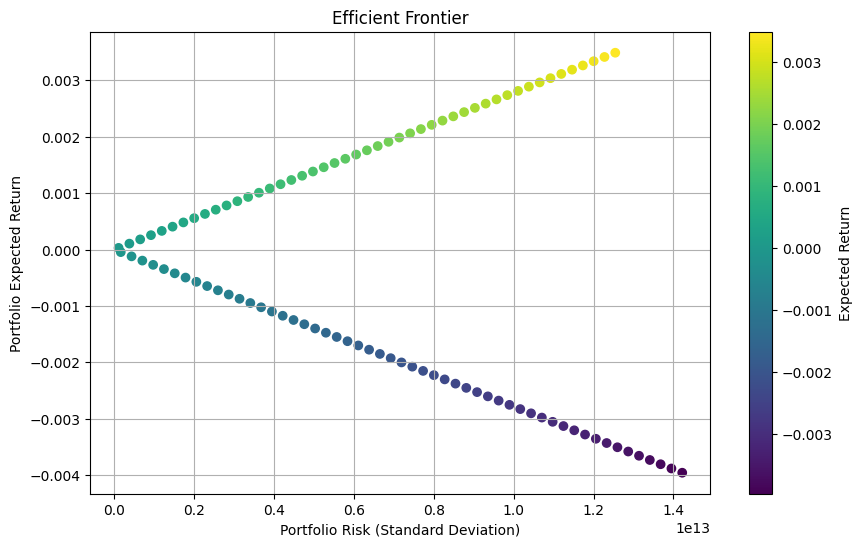

In [242]:
plot_efficient_frontier(returns)

In [243]:
def mvef(Covariance, Mu, Npoints):
    Nu = len(Mu)
    Iota = np.ones(Nu)
    
    # Initialize risk and returns
    epsilon = 0.0001
    mu_min = np.min(Mu) + epsilon * (np.mean(Mu) - np.min(Mu))
    mu_max = np.max(Mu) - epsilon * (np.max(Mu) - np.mean(Mu))
    mu_p = np.linspace(mu_min, mu_max, Npoints)
    sigma_p = np.zeros(Npoints)
    w = np.zeros((Nu, Npoints))
    
    # Defining the objective function
    def objective(weights): 
        return weights @ Covariance @ weights
    
    # Constraints
    def constraint1(weights):
        return np.sum(weights) - 1
    
    def constraint2(weights, target_return):
        return Mu @ weights - target_return
    
    # Initial guess
    init_guess = np.repeat(1/Nu, Nu)
    
    # Run optimization
    for k, target_return in enumerate(mu_p):
        cons = ({'type': 'eq', 'fun': constraint1},
                {'type': 'eq', 'fun': lambda weights: constraint2(weights, target_return)})
        
        bounds = [(0, 1) for asset in range(Nu)]
        
        result = minimize(objective, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
        w[:, k] = result.x
        sigma_p[k] = np.sqrt(result.fun)
        
    return pd.DataFrame({'sigma_p': sigma_p, 'mu_p': mu_p})

In [244]:
def mvmc(Covariance, Mu, Npoints):
    Freq = 12  # Monthly returns
    Years = 18  # 18-year simulation period
    epsilon = 0.0001  # Nudge factor for endpoint rounding
    Nu = len(Mu)
    
    # Monte Carlo simulated returns with multivariate distribution
    Nt = Years * Freq
    HalfCovariance = np.linalg.cholesky(Covariance)
    
    r_sim = np.random.normal(size=(Nt, Nu)) @ HalfCovariance / np.sqrt(Freq) + Mu / Freq

    # Estimate sample means and covariances
    Mu_sim = np.mean(r_sim, axis=0) * Freq
    Covariance_sim = np.cov(r_sim, rowvar=False) * Freq
    
    # Initialize risk and returns
    mu_min = np.min(Mu_sim) + epsilon * (np.mean(Mu_sim) - np.min(Mu_sim))
    mu_max = np.max(Mu_sim) - epsilon * (np.max(Mu_sim) - np.mean(Mu_sim))
    mu_sample = np.linspace(mu_min, mu_max, Npoints)
    
    sigma_sim = np.zeros(Npoints)
    w_sim = np.zeros((Nu, Npoints))
    
    # Define the objective function (negative because scipy minimizes)
    def objective(weights): 
        return weights @ Covariance_sim @ weights
    
    # Constraints
    def constraint1(weights):
        return np.sum(weights) - 1
    
    def constraint2(weights, target_return):
        return Mu_sim @ weights - target_return
    
    # Initial guess
    init_guess = np.repeat(1/Nu, Nu)
    
    # Run optimization
    for k, target_return in enumerate(mu_sample):
        cons = ({'type': 'eq', 'fun': constraint1},
                {'type': 'eq', 'fun': lambda weights: constraint2(weights, target_return)})
        
        bounds = [(0, 1) for asset in range(Nu)]
        
        result = minimize(objective, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
        w_sim[:, k] = result.x
        sigma_sim[k] = np.sqrt(result.fun)
    
    mu_p = np.sum(w_sim.T * Mu, axis=1)
    sigma_p = np.sqrt(np.sum((w_sim.T @ Covariance) * w_sim.T, axis=1))

    return pd.DataFrame({'mu_p': mu_p, 'sigma_p': sigma_p})

In [169]:
def plot_efficient_frontier(df, dashed=False):
    if dashed:
        sns.lineplot(x='sigma_p', y='mu_p', data=df, linestyle='--')
    else:
        sns.lineplot(x='sigma_p', y='mu_p', data=df)



Some Monte Carlo Simulations don't end up on the frontier. So, smoothing out data points in separate df for visualisation purposes. There's definitely a much better solution to this problem, though...

In [245]:
def apply_moving_average(df, window_size=5):
    # Apply moving average filter to 'mu_p' and 'sigma_p'
    df['mu_p_smooth'] = df['mu_p'].rolling(window=window_size, min_periods=1).mean()
    df['sigma_p_smooth'] = df['sigma_p'].rolling(window=window_size, min_periods=1).mean()
    # returning smoothed df
    return df[['mu_p', 'sigma_p']]


In [246]:
# Generate the efficient frontier
Npoints = 5
efficient_frontier = mvef(cov_matrix, Mu, Npoints)

In [185]:
efficient_frontier

,sigma_p,mu_p
0,NaN,-0.989029
1,NaN,-0.523668
2,NaN,-0.058307
3,NaN,0.407054
4,NaN,0.872414


In [ ]:

# Perform Monte Carlo simulations
Nsimulations = 5
# Assume you have some logic to combine multiple simulations
for _ in range(Nsimulations):
    monte_carlo_result = mvmc(Covariance, Mu, Npoints)
    plot_efficient_frontier(monte_carlo_result, dashed=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.show()